In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Display plots in line

In [2]:
#load data to variables

data = np.load('perceptron.npz') 
print(list(data)) # prints the names of all elements in `data`

data_x = data['train_x'] # nx5 matrix where there are 5 features: 0,1,2,3,4,5
target_x = data['train_y'] # the classification -1 or +1, size of 200
test_x = data['test_x']
test_y = data['test_y']

dataset_size = np.size(data_x,0) # size of dataset
num_feats = np.size(data_x,1) # number of features

train_x = np.concatenate((np.transpose(np.matrix(np.ones(dataset_size))), data_x), axis=1)

['train_x', 'test_x', 'train_y', 'test_y']


In [3]:
#Variables that we can control
learn_rate = 1 #initialize learning rate
w = np.matrix(np.ones(6)) #initialize with weights of all 1, row vector of dim 1x5, plus the offset term w0

In [4]:
w_updates = np.zeros((4,6)) #This is for part 2 
w_updates[0,:] = w
for j in range(10):
    num_misclass = 0 #number of misclassified samples after one epoch
    for i in range(dataset_size):
        featVect = np.transpose(np.matrix(train_x[i][:])) #take the ith feature vector
        a = w*featVect #matrix multiplication (dot product btwn weights and feature vector)
        if a>=0: #find y(x) = f(a) = 1 if a>=0, and -1 if a<0
            y = 1
        else:
            y = -1

        if y != target_x[i]:  #if y does not equal the target value for this x, it is a misclassified pattern
            w = w + learn_rate*np.transpose(featVect)*target_x[i] #update w
            num_misclass = num_misclass + 1
            if num_misclass < 4:
                w_updates[num_misclass,:] = w
    print('number of misclassified training examples for epoch ' +str(j) +': '+ str(num_misclass))

number of misclassified training examples for epoch 0: 13
number of misclassified training examples for epoch 1: 3
number of misclassified training examples for epoch 2: 1
number of misclassified training examples for epoch 3: 3
number of misclassified training examples for epoch 4: 5
number of misclassified training examples for epoch 5: 0
number of misclassified training examples for epoch 6: 0
number of misclassified training examples for epoch 7: 0
number of misclassified training examples for epoch 8: 0
number of misclassified training examples for epoch 9: 0


In [5]:
def findDecisionBound(x0_vect, x1_vect, w, w_offset): 
    #pass in a grid of points and find the contour, which is the decision boundary
    size_x0 = x0_vect.size
    size_x1 = x1_vect.size
    y_array = np.array(np.zeros((size_x1,size_x0)))
    for i in range(size_x0):
        for j in range(size_x1):
            x_curr = np.matrix([[x0_vect[i]],[x1_vect[j]]])
            a = w*x_curr + w_offset
            if a>=0: #find y(x) = f(a) = 1 if a>=0, and -1 if a<0
                y = 1
            else:
                y = -1
            y_array[j,i] = y
            
    return y_array

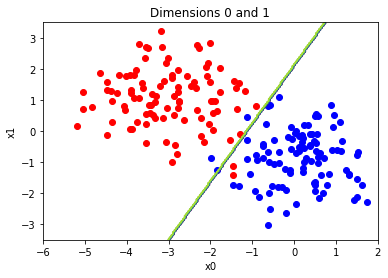

In [6]:
#Plotting dimensions 0 and 1
data_dim0 = np.transpose(data_x)[0][0:dataset_size]
data_dim1 = np.transpose(data_x)[1][0:dataset_size]

plt.figure(2)
#plot the data
for i in range(dataset_size):
    if target_x[i] == -1:
        plt.scatter(data_dim0[i], data_dim1[i] , c = 'b')
    else: 
        plt.scatter(data_dim0[i], data_dim1[i] , c = 'r')

#find the decision boundary
x0_vect = np.linspace(-6, 2, 200)
x1_vect = np.linspace(-3.5, 3.5, 200)
w_01 = w[0,1:3]
w_offset = w[0,0]
y_array01 = findDecisionBound(x0_vect, x1_vect, w_01, w_offset)

plt.contour(x0_vect, x1_vect, y_array01) 
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Dimensions 0 and 1')
plt.show()


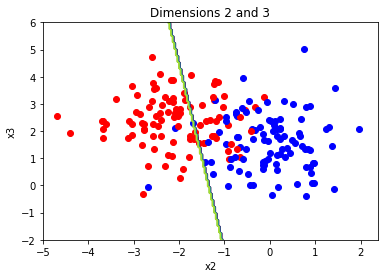

In [7]:
#Plotting dimensions 2 and 3
data_dim2 = np.transpose(data_x)[2][0:dataset_size]
data_dim3 = np.transpose(data_x)[3][0:dataset_size]
plt.figure(3)
for i in range(dataset_size):
    if target_x[i] == -1:
        plt.scatter(data_dim2[i], data_dim3[i] , c = 'b')
    else: 
        plt.scatter(data_dim2[i], data_dim3[i] , c = 'r')

#find the decision boundary
x2_vect = np.linspace(-5, 2, 200)
x3_vect = np.linspace(-2, 6, 200)
w_23 = w[0,3:5]
w_offset = w[0,0]
y_array23 = findDecisionBound(x2_vect, x3_vect, w_23, w_offset)

plt.contour(x2_vect, x3_vect, y_array23) 
plt.xlabel('x2')
plt.ylabel('x3')
plt.title('Dimensions 2 and 3')
plt.show()

C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


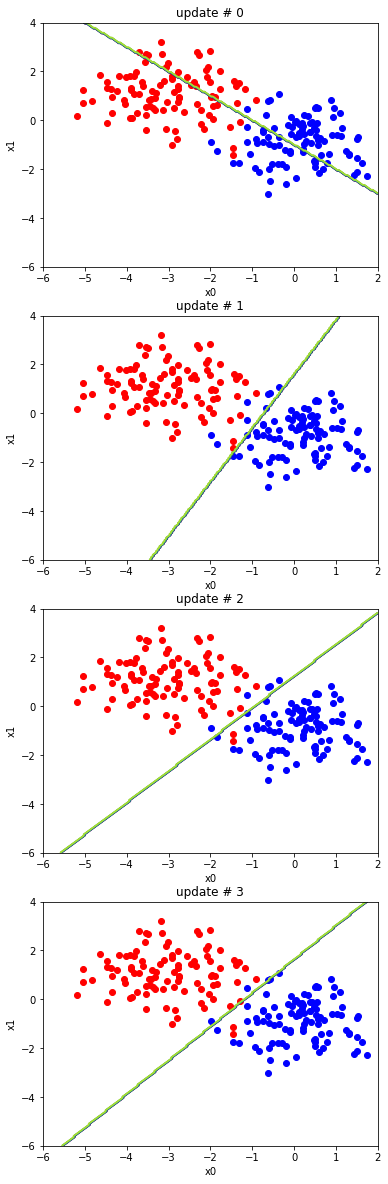

In [8]:
#Plot the decision boundary and training points in feature dimensions 0 and 1 after 3 updates to decision boundary
plt.figure(4)
#find the decision boundary
x0_vect = np.linspace(-6, 2, 200)
x1_vect = np.linspace(-6, 4, 200)

for j in range(4):
    plt.subplot(4, 1, j+1)
    plt.ylabel('x1')
    plt.xlabel('x0')
    plt.title('update # ' + str(j))
    w_01 = w_updates[j, 1:3]
    w_offset = w_updates[j, 0]
    y_array = findDecisionBound(x0_vect, x1_vect, w_01, w_offset)
    plt.contour(x0_vect, x1_vect, y_array) 
    for i in range(dataset_size):
        if target_x[i] == -1:
            plt.subplot(4,1,j+1)
            plt.scatter(data_dim0[i], data_dim1[i] , c = 'b')
        else: 
            plt.subplot(4,1,j+1)
            plt.scatter(data_dim0[i], data_dim1[i] , c = 'r')
           
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=4, wspace=0.2, hspace=0.2)
plt.show()